# HW3 - Flight Data Analysis

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
%matplotlib inline

## Gather Data 


We need to gather up to date information

Install requirments.txt so we can scrape

pip install -r requirments.txt

In [4]:
!python scrape.py

waiting for 10


We need to make this data usable

## Data Formatting



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Let's load the csv into a dataframe

In [41]:
df = pd.read_csv('data/flight_data.csv', encoding='ISO-8859-1')

Lets clean the data now

In [42]:
df['Main Cabin Price'] = df['Main Cabin Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Comfort Plus Price'] = df['Comfort Plus Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

Let's visualize the distribution of prices

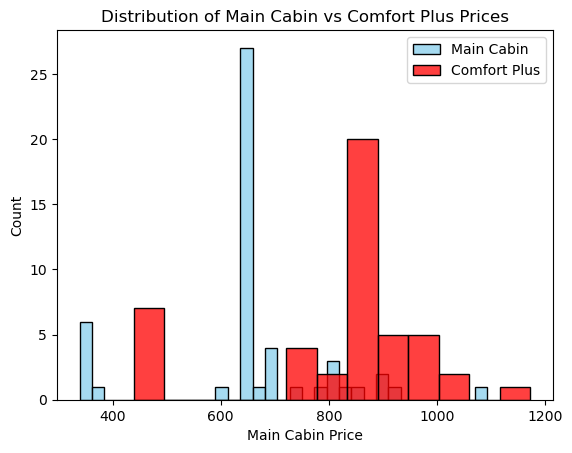

In [43]:
sns.histplot(df['Main Cabin Price'].dropna(), color="skyblue", label="Main Cabin")
sns.histplot(df['Comfort Plus Price'].dropna(), color="red", label="Comfort Plus")
plt.title('Distribution of Main Cabin vs Comfort Plus Prices')
plt.legend()  # This will add a legend
plt.show()

Let's analyze the significant difference between main and comfort plus

In [44]:
# Analyze data (example)
from scipy.stats import ttest_ind

main_cabin_prices = df['Main Cabin Price'].dropna()
comfort_plus_prices = df['Comfort Plus Price'].dropna()

t_stat, p_val = ttest_ind(main_cabin_prices, comfort_plus_prices)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -4.8443837535704, P-value: 4.928818504600198e-06


# Digging Deeper

Let's see if there's a relationship between length of flight and flight price.

Let's convert our Flight Duration to a numeric format

In [45]:
df['Flight Duration'] = df['Flight Duration'].apply(lambda x: int(x.split('h')[0])*60 + int(x.split('h')[1].split('m')[0]))

we can perform a correlation analysis between 'Flight Duration' and 'Main Cabin Price' or 'Comfort Plus Price'

In [46]:
# Correlation with Main Cabin Price
print('Correlation with Main Cabin Price:', df['Flight Duration'].corr(df['Main Cabin Price']))

# Correlation with Comfort Plus Price
print('Correlation with Comfort Plus Price:', df['Flight Duration'].corr(df['Comfort Plus Price']))

Correlation with Main Cabin Price: 0.5226650244230557
Correlation with Comfort Plus Price: 0.6862878861705966


Look for differences in flight prices between nonstop flights and flights with stops.

In [47]:
df.groupby('Number of stops')['Main Cabin Price'].mean()
df.groupby('Number of stops')['Comfort Plus Price'].mean()

Number of stops
1 stop     884.282051
nonstop    444.714286
Name: Comfort Plus Price, dtype: float64

Plot the flight prices against flight duration.

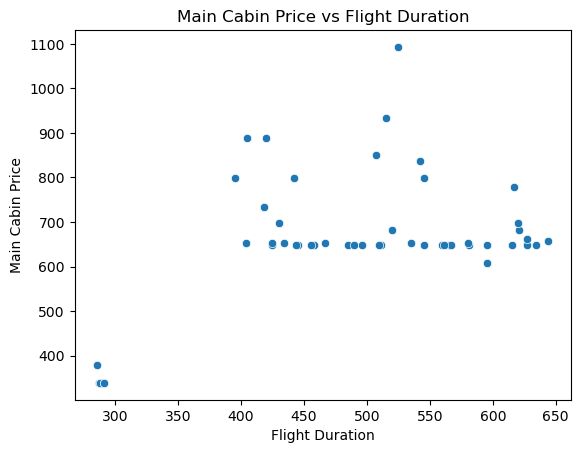

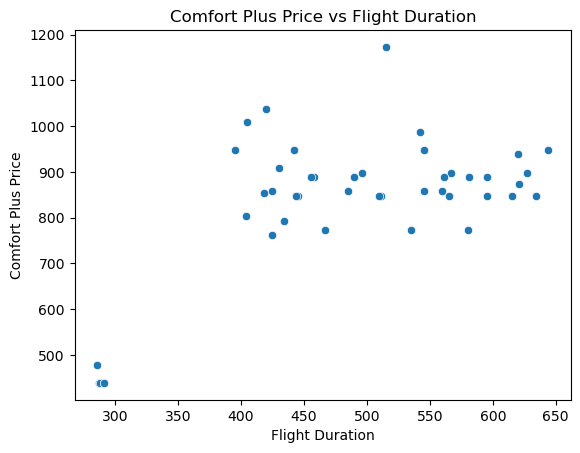

In [36]:
sns.scatterplot(x='Flight Duration', y='Main Cabin Price', data=df)
plt.title('Main Cabin Price vs Flight Duration')
plt.show()

sns.scatterplot(x='Flight Duration', y='Comfort Plus Price', data=df)
plt.title('Comfort Plus Price vs Flight Duration')
plt.show()


Box plots to compare flight prices for nonstop flights and flights with stops.

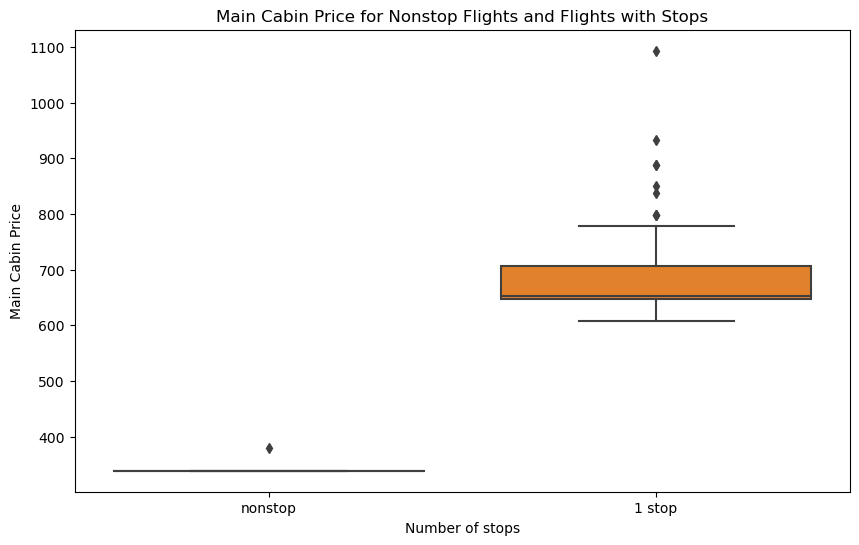

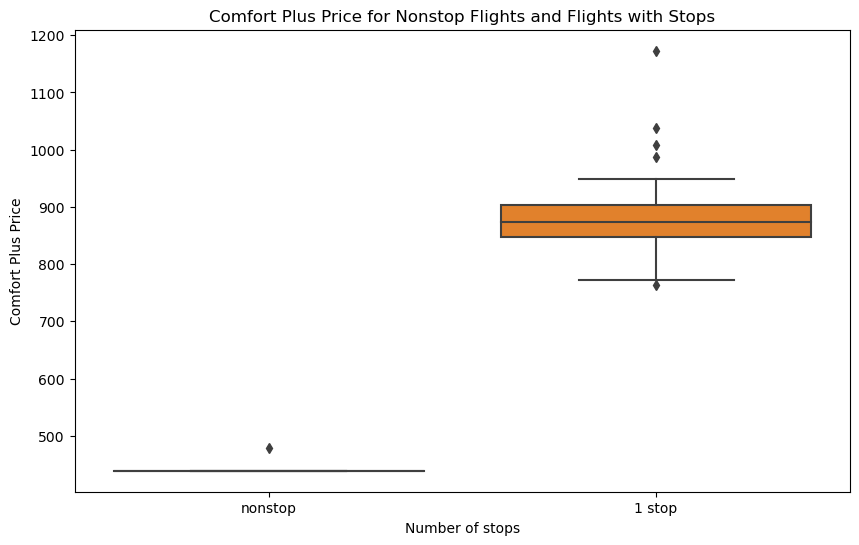

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of stops', y='Main Cabin Price', data=df)
plt.title('Main Cabin Price for Nonstop Flights and Flights with Stops')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of stops', y='Comfort Plus Price', data=df)
plt.title('Comfort Plus Price for Nonstop Flights and Flights with Stops')
plt.show()

Let's calculate confidence intervals for our data

In [49]:
import numpy as np

Define a function to calculate the mean price from a bootstrap sample


In [50]:
def bootstrap_mean(data, n_bootstrap_samples=1000):
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap_samples, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    return bootstrap_means

Generating bootstrap samples of prices

# Generate bootstrap samples of the main cabin prices
main_cabin_bootstrap_means = bootstrap_mean(df['Main Cabin Price'].dropna())

# Generate bootstrap samples of the comfort plus prices
comfort_plus_bootstrap_means = bootstrap_mean(df['Comfort Plus Price'].dropna())

Now we can use our bootstrap samples to calculate things like confidence intervals

In [52]:
confidence_interval_main_cabin = np.percentile(main_cabin_bootstrap_means, [2.5, 97.5])
confidence_interval_comfort_plus = np.percentile(comfort_plus_bootstrap_means, [2.5, 97.5])

print(f"95% confidence interval for the mean Main Cabin Price: {confidence_interval_main_cabin}")
print(f"95% confidence interval for the mean Comfort Plus Price: {confidence_interval_comfort_plus}")

95% confidence interval for the mean Main Cabin Price: [616.74215686 697.61176471]
95% confidence interval for the mean Comfort Plus Price: [771.3673913  865.11902174]


# Conclusion / Future Approaches

To take this data further what we really need is historical data. Similar to HW2 where we combined multiple csv's, we can take a similar approach here to gather historical data. We could define a CRON job that would run "scrape.py" daily at a certain time and grow our historical data. Once we have this historical data we can then analyze and make future predictions.

Fun things to note!

* Delta.com is not friendly to web scraping, they are very good at avoiding all the normal tricks.
* Since we are using a 3rd party "kayak.com" we may need to analyze to make sure the data they provide is accurate
* May be worth exploring some of the available API's to Gather the data then perform the analysis over it that way, may be good future proofing.
* May be able to scrape and store data and turn that into a API for others to use (See RapidAPI as an example).